In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
def generate_regression_data(n=30):
    # Generate regression dataset
    X = np.linspace(-5, 5, n).reshape(-1, 1)
    y = np.sin(2 * X) + np.cos(X) + 5
    # simulate noise
    data_noise = np.random.normal(0, 0.2, n).reshape(-1, 1)
    # Generate training data
    Y = y + data_noise

    return X.reshape(-1, 1), Y.reshape(-1, 1)

In [ ]:
def generate_classification_data(n=30):
    # Class 1 - samples generation
    X1_1 = 1 + 4 * np.random.rand(n, 1)
    X1_2 = 1 + 4 * np.random.rand(n, 1)
    class1 = np.concatenate((X1_1, X1_2), axis=1)
    Y1 = np.ones(n)

    # Class 0 - samples generation
    X0_1 = 3 + 4 * np.random.rand(n, 1)
    X0_2 = 3 + 4 * np.random.rand(n, 1)
    class0 = np.concatenate((X0_1, X0_2), axis=1)
    Y0 = np.zeros(n)

    X = np.concatenate((class1, class0))
    Y = np.concatenate((Y1, Y0))

    idx0 = [i for i, v in enumerate(Y) if v == 0]
    idx1 = [i for i, v in enumerate(Y) if v == 1]

    return X, Y, idx0, idx1

Zad 1

In [ ]:
X, Y = generate_regression_data()

In [ ]:
model = tf.keras.Sequential([
    #tf.keras.layers.Normalization(mean = 0, variance=1),
    tf.keras.layers.Dense(64, 'relu', input_shape = (1, )),
    # tf.keras.layers.Dense(32, 'relu', input_shape = (32, )),
    # tf.keras.layers.Dense(16, 'relu', input_shape = (32, )),
    # tf.keras.layers.Dense(1)

])

history = tf.keras.callbacks.History()

model.compile(optimizer='SGD', loss = tf.keras.losses.MAE)
model.fit(X, Y, epochs=500, callbacks = [history])

Epoch 1/1000
1/1 [==============================] - 1s 868ms/step - loss: 4.6760
Epoch 2/1000
1/1 [==============================] - 0s 19ms/step - loss: 4.6757
Epoch 3/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.6754
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 4.6751
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.6748
Epoch 6/1000
1/1 [==============================] - 0s 19ms/step - loss: 4.6745
Epoch 7/1000
1/1 [==============================] - 0s 22ms/step - loss: 4.6742
Epoch 8/1000
1/1 [==============================] - 0s 19ms/step - loss: 4.6739
Epoch 9/1000
1/1 [==============================] - 0s 25ms/step - loss: 4.6736
Epoch 10/1000
1/1 [==============================] - 0s 20ms/step - loss: 4.6733
Epoch 11/1000
1/1 [==============================] - 0s 18ms/step - loss: 4.6730
Epoch 12/1000
1/1 [==============================] - 0s 22ms/step - loss: 4.6727
Epoch 13/1000
1/1 [=================

4/4 [==============================] - 0s 4ms/step


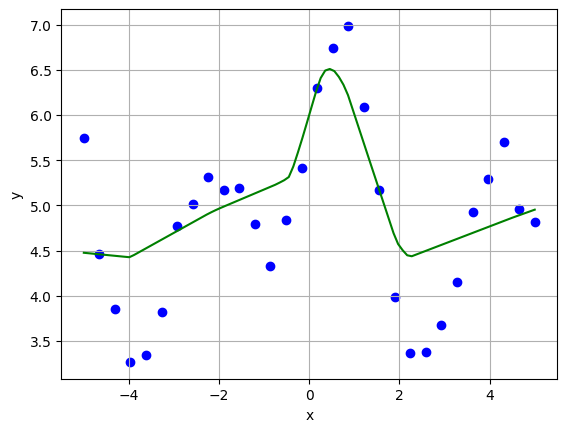

In [ ]:
predX1 = np.linspace(min(X), max(X), 100)
predY1 = model.predict(predX1)
plt.figure()
#print(predY1)
plt.scatter(X, Y, label = "Dane uczące", color = 'blue')
plt.plot(predX1, predY1, color = 'green')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 9ms/step
dict_keys(['loss'])


KeyError: ignored

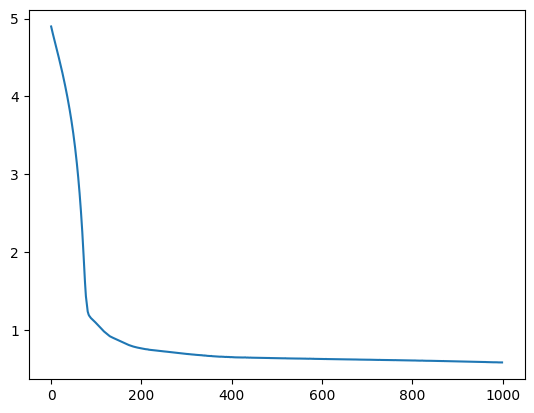

In [ ]:
predX1 = np.linspace(min(X), max(X), 100)
predY1 = model.predict(predX1)
hist = history.history
plt.figure()
plt.plot(hist['loss'], label = 'Treningowa')
print(history.history.keys())
plt.plot(hist['val_loss'], label = "Walidacyjna")

plt.title('zmiany funkcji strat w czasie')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()